In [1]:
#categorical Variables:
#2 types:1.nominal--not in order(ex-red,green,yellow)
#        2.Ordinal--in order(ex-low,medium,high)

In [2]:
#So we use one hot encoding

In [3]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('E:\py\homeprices_.csv')

In [6]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [8]:
dummies=pd.get_dummies(df.town)

In [9]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [18]:
merged=pd.concat([df,dummies],axis='columns')

In [19]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [23]:
final=merged.drop(['town'],axis='columns')

In [24]:
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [25]:
#we also need to drop one of the hot encoded columns,So that the columns are co-related to each other it is best practice in ML,
#--otherwise it will create problem in ML,So if we have 5 hot encoded we will have 4 columns.i.e: (n-1) columns
final=final.drop(['west windsor'],axis='columns')

In [26]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [34]:
x=np.array(final[['area','monroe township','robinsville']])

In [35]:
x

array([[2600,    1,    0],
       [3000,    1,    0],
       [3200,    1,    0],
       [3600,    1,    0],
       [4000,    1,    0],
       [2600,    0,    0],
       [2800,    0,    0],
       [3300,    0,    0],
       [3600,    0,    0],
       [2600,    0,    1],
       [2900,    0,    1],
       [3100,    0,    1],
       [3600,    0,    1]], dtype=int64)

In [36]:
y=np.array(final.price)

In [37]:
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [38]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [40]:
model.intercept_

249790.36766292533

In [41]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [42]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [43]:
#to know the accuracy of the model:
model.score(x,y)

0.9573929037221873

In [44]:
#Assignment:



In [46]:
df=pd.read_csv(r'E:\py\py-master\ML\5_one_hot_encoding\Exercise\carprices.csv')

In [47]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [116]:
import matplotlib.pyplot as plt
df=df.rename(columns={'Sell Price($)':'sell_price','Car Model':'car'})

TypeError: 'str' object is not callable

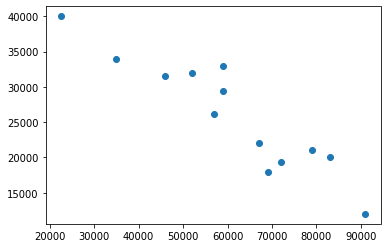

In [117]:
%matplotlib inline
plt.scatter(df.Mileage,df.sell_price)
plt.xlabel('year')
plt.ylabel('income')



In [81]:
dummies=pd.get_dummies(df.car)

In [82]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [86]:
mod=pd.concat([df,dummies],axis='columns')

In [87]:
mod

,car,Mileage,sell_price,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [90]:
mod=mod.drop(['car','BMW X5'],axis='columns')

In [91]:
mod

,Mileage,sell_price,Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [93]:
reg=LinearRegression()

In [99]:
x=np.array(mod[['Mileage','Age(yrs)','Audi A5','Mercedez Benz C class']])

In [100]:
x

array([[69000,     6,     0,     0],
       [35000,     3,     0,     0],
       [57000,     5,     0,     0],
       [22500,     2,     0,     0],
       [46000,     4,     0,     0],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     1],
       [83000,     7,     0,     1],
       [79000,     7,     0,     1],
       [59000,     5,     0,     1]], dtype=int64)

In [101]:
y=np.array(mod.sell_price)

In [102]:
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [103]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
reg.predict([[50000,4,0,0]])

array([28402.4994128])

In [109]:
reg.score(x,y)

0.9417050937281082